In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_origin = pd.read_csv('origin/art_daily_no_noise.csv')
print(df_origin)

                timestamp     value
0     2014-04-01 00:00:00  20.00000
1     2014-04-01 00:05:00  20.00000
2     2014-04-01 00:10:00  20.00000
3     2014-04-01 00:15:00  20.00000
4     2014-04-01 00:20:00  20.00000
...                   ...       ...
4027  2014-04-14 23:35:00  20.00384
4028  2014-04-14 23:40:00  20.00384
4029  2014-04-14 23:45:00  20.00384
4030  2014-04-14 23:50:00  20.00384
4031  2014-04-14 23:55:00  20.00384

[4032 rows x 2 columns]


In [12]:
df_origin_value = df_origin.columns[1]
np_orgin_value = df_origin[df_origin_value].values

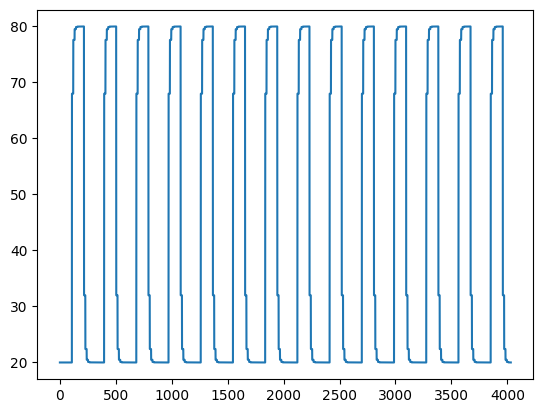

In [13]:
plt.plot(np_orgin_value)

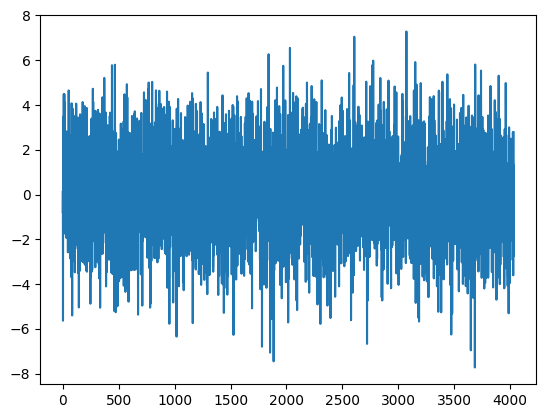

In [17]:
np_random_value = 2*np.random.normal(0,1,len(np_orgin_value))
plt.plot(np_random_value)

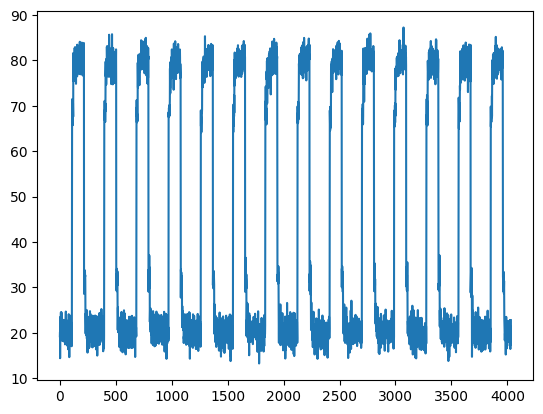

In [18]:
np_normal_noise = np_random_value + np_orgin_value
plt.plot(np_normal_noise)

여기부터 실행코드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_origin = pd.read_csv('origin/art_daily_no_noise.csv')
df_origin_value = df_origin.columns[1]
np_orgin_value = df_origin[df_origin_value].values
len_value = len(np_orgin_value)

In [6]:
#약간의 노이즈 추가하여 normal 데이터 생성
for i in range(1000):
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    
    np_error = np.array([0 for _ in range(len_value)])
    np_normal_error  = np.column_stack((np_normal_noise,np_error))
    header="value,error"
    np.savetxt(f"normal/normal_data{i}.csv",np_normal_error,delimiter=',',header=header, comments='')

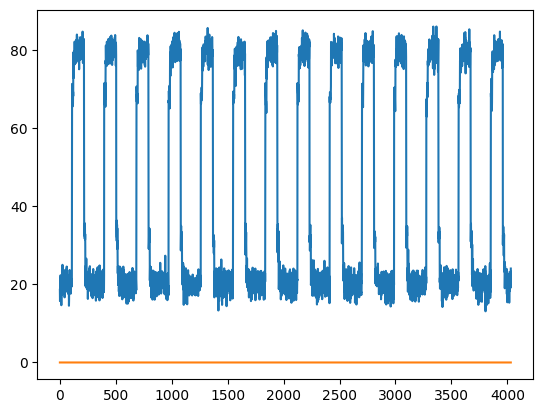

In [7]:
test = pd.read_csv('normal/normal_data634.csv')
plt.plot(test["value"])
plt.plot(test["error"])

In [10]:
#drift 생성
for i in range(1000):
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    #drift 초기화
    drift_start = np.random.randint(100, 2500) #drift 시작할 번째
    drift_offset = 100*np.random.randint(5, 15) #drift 지속 시간
    drift_size = 0.1*(1+0.1*np.random.randint(1, 10)) #drift y축 크기
    # drift error 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[drift_start:drift_start+drift_offset] = drift_size*np.arange(0, drift_offset)
    # normal애 drift 에러 추가
    np_anormal_drift =  np_normal_noise
    np_anormal_drift += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[drift_start:drift_start+drift_offset] = np.array([1 for _ in range(drift_offset)])

    np_anormal_drift_error = np.column_stack((np_anormal_drift,np_error,np_error_size))
    header="value,error,error_size"
    np.savetxt(f"anormal_drift/drift_data{i}.csv",np_anormal_drift_error,delimiter=',',header=header, comments='')

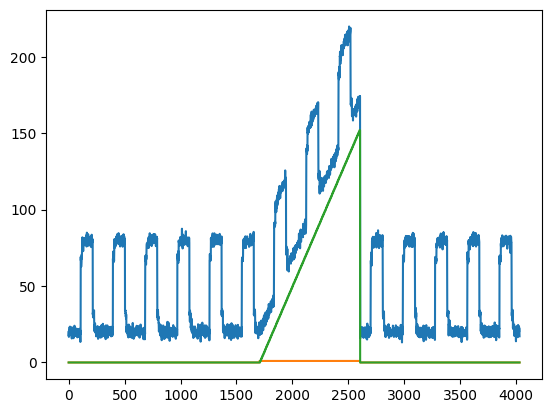

In [11]:
test = pd.read_csv('anormal_drift/drift_data232.csv')
plt.plot(test["value"])
plt.plot(test["error"])
plt.plot(test["error_size"])

In [12]:
#hard-over 생성
for i in range(1000):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    #hard-over 초기화
    hardover_start = np.random.randint(100, 2500) #hardover 시작할 구간
    hardover_offset =  100*np.random.randint(5, 15) #hardover 지속시간
    hardover_size = np.random.randint(50, 200) # hardover y축 크기
    #hard-over 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[hardover_start:hardover_start+hardover_offset] = hardover_size*np.array([1 for _ in range(hardover_offset)])
    #normal에 hardover 에러 추가
    np_anormal_hardover = np_normal_noise
    np_anormal_hardover += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[hardover_start:hardover_start+hardover_offset] = np.array([1 for _ in range(hardover_offset)])

    np_anormal_hardover_error = np.column_stack((np_anormal_hardover,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"anormal_hardover/hardover_data{i}.csv",np_anormal_hardover_error,delimiter=',',header=header,comments='')

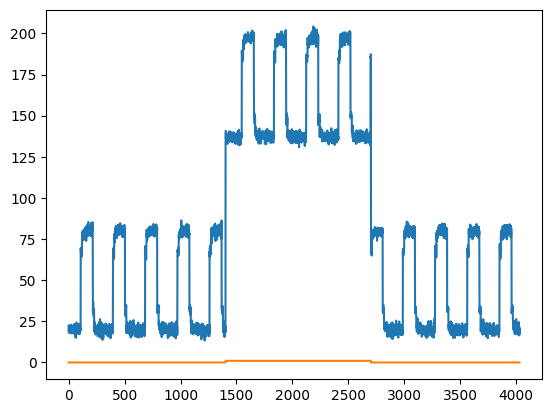

In [14]:
test = pd.read_csv("anormal_hardover/hardover_data97.csv")
plt.plot(test["value"])
plt.plot(test["error"])
#plt.plot(test["error_size"])

In [15]:
#erratic 생성
for i in range(1000):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    #erratic 초기화
    erratic_start = np.random.randint(100, 2500) #erratic 시작할 구간
    erratic_offset =  100*np.random.randint(5, 15) #erratic 지속시간
    erratic_size = np.random.randint(20, 40) # erratic 크기
    #erratic 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[erratic_start:erratic_start+erratic_offset] = erratic_size*np.random.normal(0,1,erratic_offset)
    # normal에 erratic에러 추가
    np_anormal_erratic = np_normal_noise
    np_anormal_erratic += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[erratic_start:erratic_start+erratic_offset] = np.array([1 for _ in range(erratic_offset)])
    
    np_anormal_erratic_error  = np.column_stack((np_anormal_erratic,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"anormal_erratic/erratic_data{i}.csv",np_anormal_erratic_error,delimiter=',',header=header,comments='')

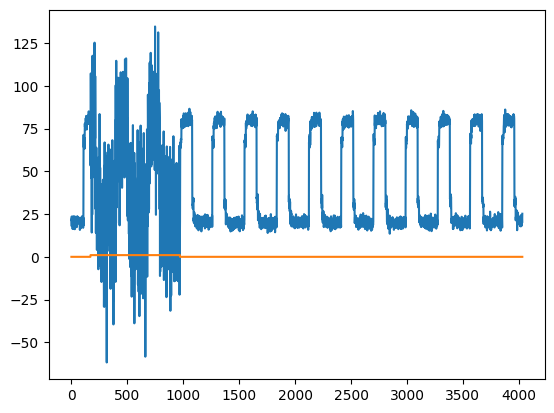

In [21]:
test = pd.read_csv("anormal_erratic/erratic_data917.csv")
plt.plot(test["value"])
plt.plot(test["error"])
#plt.plot(test["error_size"])

In [24]:
#spike 생성
for i in range(1000):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    #spike 초기화
    spike_start = np.random.randint(100,2000)
    spike_offset = 20*np.random.randint(5,20)
    spike_time = np.random.randint(3,5) # 2번이상 반복되야함
    #spike 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    for spike in range(spike_time):
        np_error_size[spike_start+spike*spike_offset] = np.random.randint(150,200)
    #normal에 hardover 에러 추가
    np_anormal_spike = np_normal_noise
    np_anormal_spike += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    for spike in range(spike_time):
        np_error[spike_start+spike*spike_offset] = np.array([1])

    np_anormal_spike_error = np.column_stack((np_anormal_spike,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"anormal_spike/spike_data{i}.csv",np_anormal_spike_error,delimiter=',',header=header,comments='')

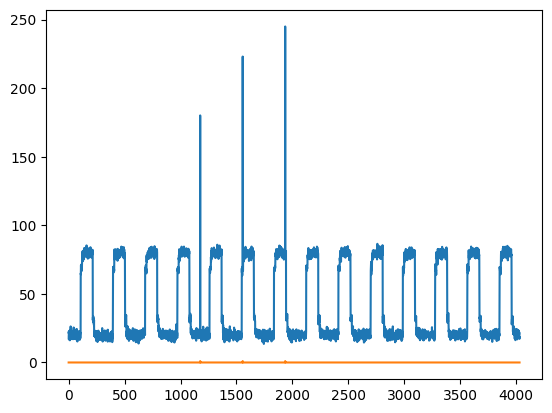

In [27]:
test = pd.read_csv("anormal_spike/spike_data12.csv")
plt.plot(test["value"])
#plt.plot(test["error_size"])
plt.plot(test['error'])

In [28]:
#stuck 생성
for i in range(1000):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orgin_value
    #stuck 초기화
    stuck_start = np.random.randint(100,2500)
    stuck_offset = 100*np.random.randint(5,15)
    #stuck_error 구하기
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[stuck_start:stuck_start+stuck_offset] = np.array([np_normal_noise[stuck_start] for _ in range(stuck_offset)]) - np_normal_noise[stuck_start:stuck_start+stuck_offset]
    #normal 에 stuck
    np_anormal_stuck = np_normal_noise
    np_anormal_stuck[stuck_start:stuck_start+stuck_offset] = np.array([np_normal_noise[stuck_start] for _ in range(stuck_offset)])
    
    np_error =np.array([0 for _ in range(len_value)])
    np_error[stuck_start:stuck_start+stuck_offset] = np.array([1 for _ in range(stuck_offset)])

    np_anormal_stuck_error = np.column_stack((np_anormal_stuck,np_error,np_error_size))
    header='value,error,error_size'
    np.savetxt(f"anormal_stuck/stuck_data{i}.csv",np_anormal_stuck_error,delimiter=',',header=header,comments='') 
    

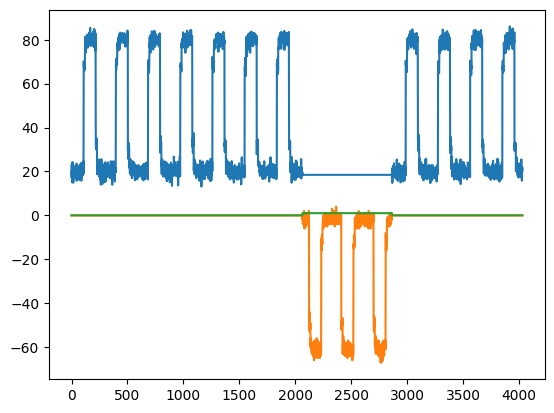

In [30]:
test = pd.read_csv("anormal_stuck/stuck_data723.csv")
plt.plot(test["value"])
plt.plot(test["error_size"])
plt.plot(test["error"])